In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Load the processed data
data = pd.read_csv('./processed_alzheimers_data.csv')

In [3]:
# Separate features and target
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [5]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       277
           1       0.73      0.65      0.69       153

    accuracy                           0.79       430
   macro avg       0.78      0.76      0.77       430
weighted avg       0.79      0.79      0.79       430



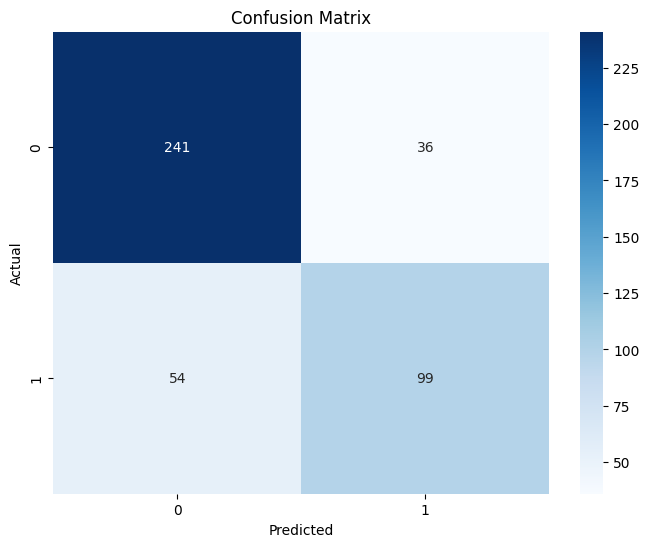

In [6]:
# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

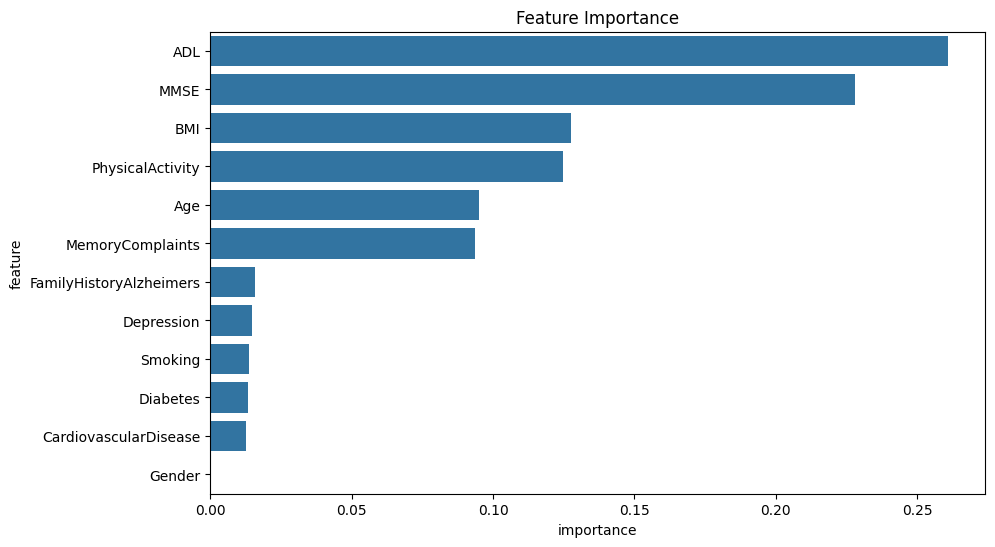

In [7]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Save the model (works better when all the code is ran at once)
with open('alzheimers_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
print("Model saved as alzheimers_model.pkl")